
# Importing Libraries


In [1]:
from google.colab import files

import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,f1_score, accuracy_score, classification_report


# Loading Data from Kaggle

In [2]:
files.upload()  #this will prompt you to upload the kaggle.json downloaded from your kaggle account

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

!kaggle datasets download -d blastchar/telco-customer-churn # dataset name, can be taken from the page url



Saving kaggle.json to kaggle.json
kaggle.json
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 86.6MB/s]


In [3]:
!unzip  /content/telco-customer-churn.zip

Archive:  /content/telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [4]:
data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Explarotary Data Analysis 

##dataset's shape

In [71]:
print("We have {} rows and {} columns".format(data.shape[0],data.shape[1]))

We have 7010 rows and 20 columns


##dataset's values features and characteristisc

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [5]:
data=data.drop(columns='customerID') # it's irrelevant

In [61]:
print("The names of the columns are")
data.columns

The names of the columns are


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
numerical_feat=['tenure','MonthlyCharges','TotalCharges']
categorical_feat=[i for i in data.columns if i not in numerical_feat]
print("Numerical features are:\n", numerical_feat)
print("Categorical features are:\n", categorical_feat)

Numerical features are:
 ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features are:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [63]:
for i in categorical_feat:
  print(i)
  print(data[i].value_counts())
  print()

gender
1    3535
0    3475
Name: gender, dtype: int64

SeniorCitizen
0    5869
1    1141
Name: SeniorCitizen, dtype: int64

Partner
0    3617
1    3393
Name: Partner, dtype: int64

Dependents
0    4911
1    2099
Name: Dependents, dtype: int64

PhoneService
1    6330
0     680
Name: PhoneService, dtype: int64

MultipleLines
0    3363
2    2967
1     680
Name: MultipleLines, dtype: int64

InternetService
1    3090
0    2414
2    1506
Name: InternetService, dtype: int64

OnlineSecurity
0    3489
2    2015
1    1506
Name: OnlineSecurity, dtype: int64

OnlineBackup
0    3079
2    2425
1    1506
Name: OnlineBackup, dtype: int64

DeviceProtection
0    3086
2    2418
1    1506
Name: DeviceProtection, dtype: int64

TechSupport
0    3464
2    2040
1    1506
Name: TechSupport, dtype: int64

StreamingTV
0    2801
2    2703
1    1506
Name: StreamingTV, dtype: int64

StreamingMovies
0    2773
2    2731
1    1506
Name: StreamingMovies, dtype: int64

Contract
0    3853
2    1685
1    1472
Name: Contra

In [7]:
print("Removing Duplicates")
print("dataset's shape was", data.shape)

#Here we chack if there's any duplicated row inside of the dataset
print(data.duplicated(subset=None, keep='first').any()) # returns true or false

#Since there are duplicates, we need to remove them
data.drop_duplicates(subset=None, keep='first', inplace = True) 

#We double check to make sure there are no duplicates anymore
print(data.duplicated(subset=None, keep='first').any()) # returns true or false

Removing Duplicates
dataset's shape was (7043, 20)
True
False


In [66]:
print("There are no duplicates to be removed")


There are no duplicates to be removed


# Visualization

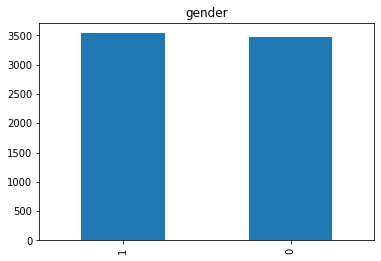

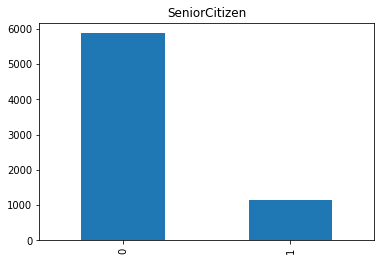

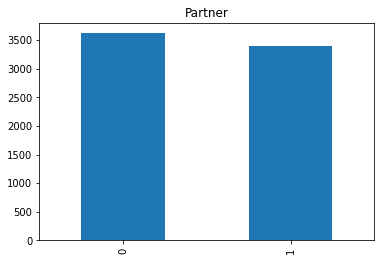

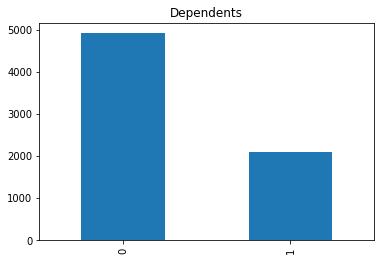

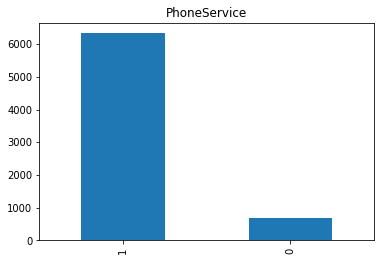

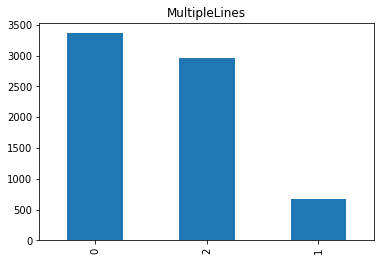

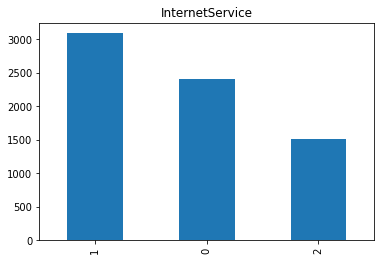

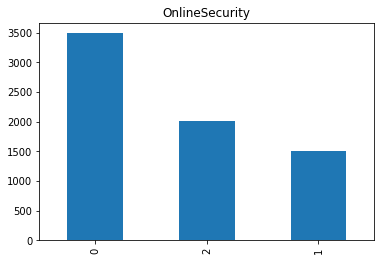

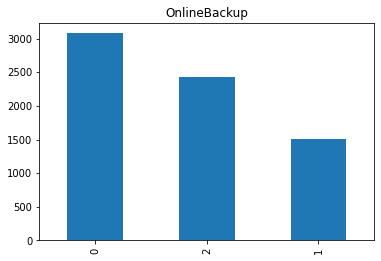

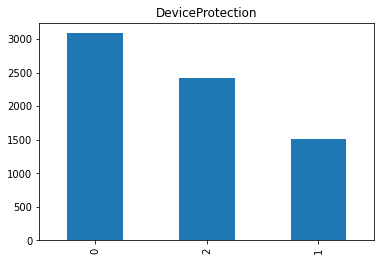

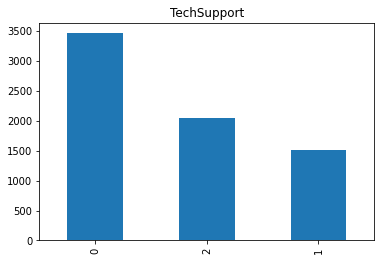

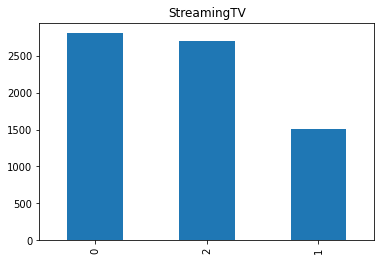

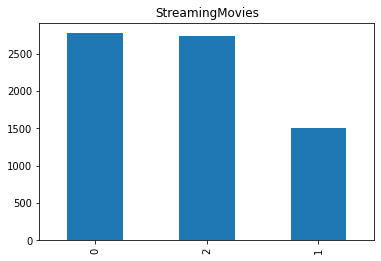

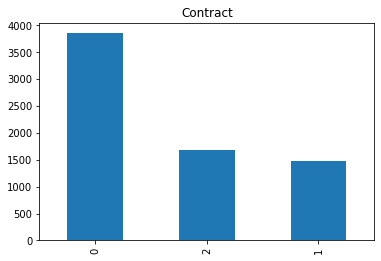

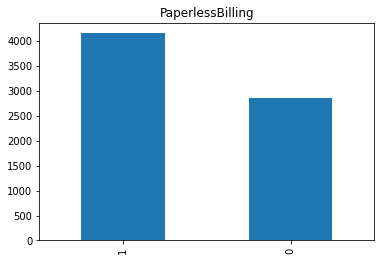

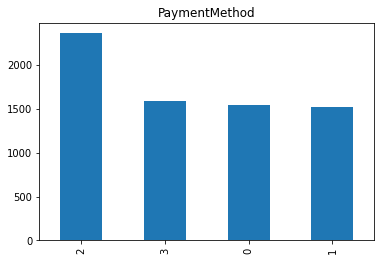

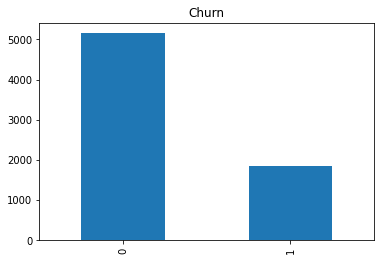

In [67]:
# to plot all categoical features in the data in boxplots
for column in categorical_feat:
    plt.figure()
    data[column].value_counts().plot.bar(title= column)


## Analysis for the Distribution of categorical features


*   We can see that there are nearly same distribution for gender(males and females and partner(yes or no) feature values.  
*   However, we can see Distinct distributions for the classes of the other features

*  Regarding the churn target variable we can see that there is a huge difference between the number of churned and the number of unchurned (number of unchurned cases way more bigger) which will result in having Bias toward unchurned 
 





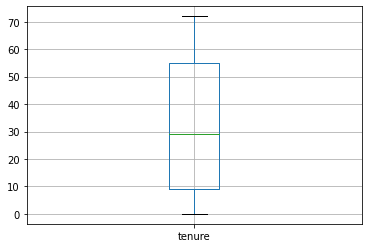

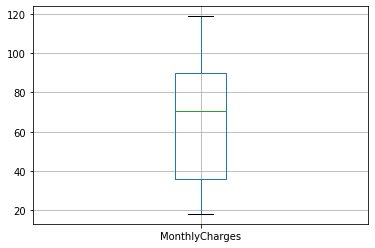

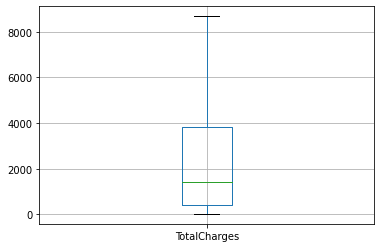

In [8]:
#Converting Object column to Numerical Column, which is actually holds Numerical data
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce') #invalid parsing will be set as NaN
for column in data[numerical_feat]:
    plt.figure()
    data[numerical_feat].boxplot([column])


# Pre-Processing

## Normalization for numerical data 

In [9]:
print('Normalization')
num_data_max=data[numerical_feat].max()

data[numerical_feat]=data[numerical_feat].divide(num_data_max)
data.head()

Normalization


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.251368,0.003437,No
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.479579,0.217564,No
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.453474,0.012453,Yes
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.356211,0.211951,No
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.595368,0.017462,Yes


<ipython-input-70-eb3cc0fcd0d6>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

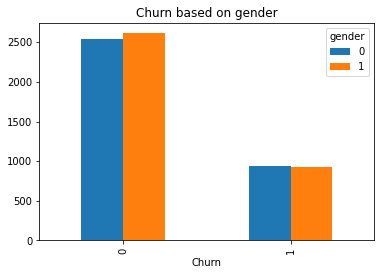

<Figure size 432x288 with 0 Axes>

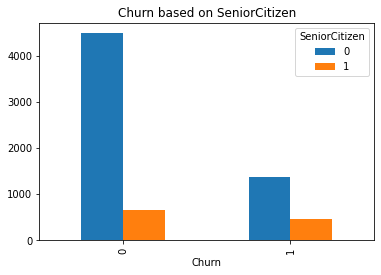

<Figure size 432x288 with 0 Axes>

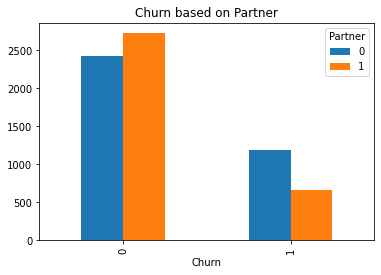

<Figure size 432x288 with 0 Axes>

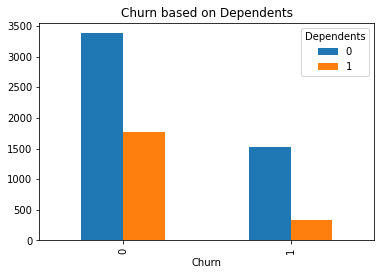

<Figure size 432x288 with 0 Axes>

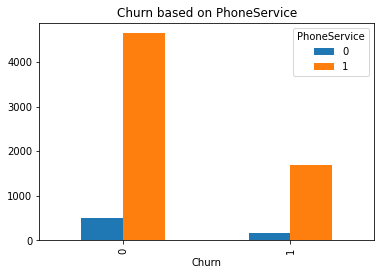

<Figure size 432x288 with 0 Axes>

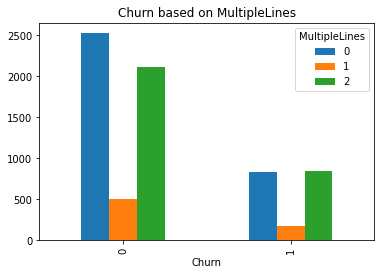

<Figure size 432x288 with 0 Axes>

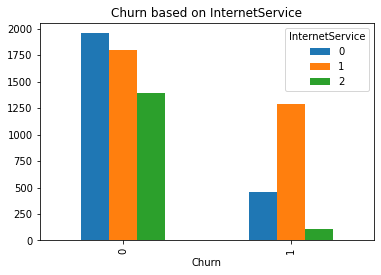

<Figure size 432x288 with 0 Axes>

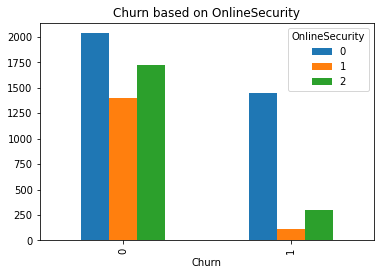

<Figure size 432x288 with 0 Axes>

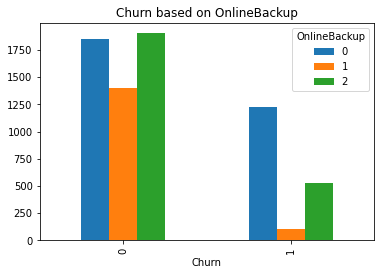

<Figure size 432x288 with 0 Axes>

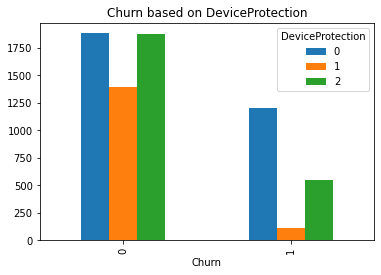

<Figure size 432x288 with 0 Axes>

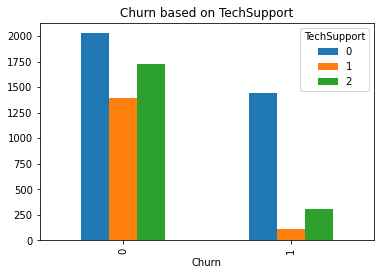

<Figure size 432x288 with 0 Axes>

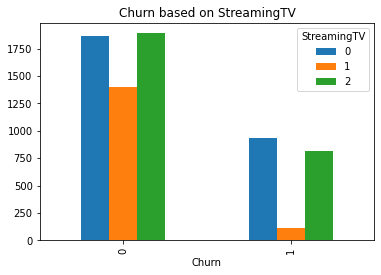

<Figure size 432x288 with 0 Axes>

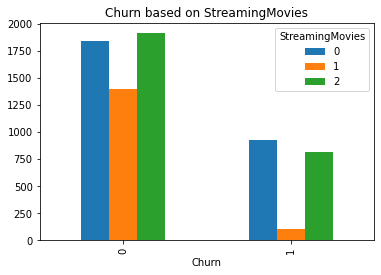

<Figure size 432x288 with 0 Axes>

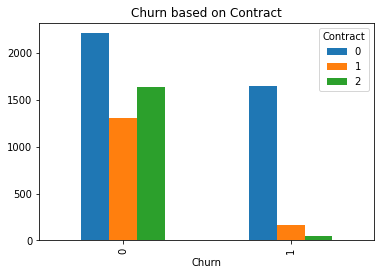

<Figure size 432x288 with 0 Axes>

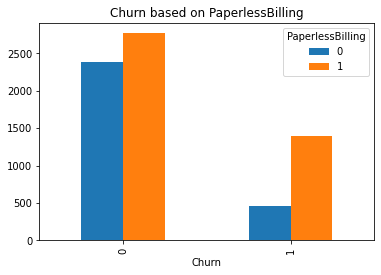

<Figure size 432x288 with 0 Axes>

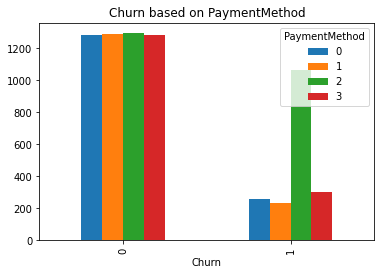

In [70]:
## Pivot
for i in categorical_feat:
  if i !="Churn":
    plt.figure()
    pd.crosstab(data["Churn"],data[i]).plot.bar(title= "Churn based on "+str(i))
    #print()


Analysis for churn based on categorical features:

1.   Gender: There is no meaningful effect for gender in predicting churn status
2.   Partner: Having no partner may affect churn status, when no partners there's higher probability for churning
3. Dependents: Having no dependent may increase the chance for churn
4. Phone Service:It's not clear enough to indicate its effect on churn target 
5. Multiple Lines: It's not clear enough to indicate its effect on churn target
6. Internet Service - Online security - Online Backup - Device Protection - Streaming TV - Streaming Movies : they affect churn 
7. Contract: having longer contract leads to reducing churn possibility
8. PaperBilling: it may lead to increase churn
9. Payment Method: it leads to increase churn


## Checking for missing data

In [10]:
# checking missing values
print(data.isna().sum(axis = 0) )
data=data.dropna(axis='index')
print("After dropping missing rows if any")
data.isna().sum(axis = 0) 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
After dropping missing rows if any


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Encoding categorical features

In [11]:
              ## automated Encoding
encoder = LabelEncoder()

for i in categorical_feat:
  data[i]=encoder.fit_transform(data[i])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.251368,0.003437,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.479579,0.217564,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.453474,0.012453,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.356211,0.211951,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.595368,0.017462,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   int64  
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   int64  
 3   Dependents        7010 non-null   int64  
 4   tenure            7010 non-null   float64
 5   PhoneService      7010 non-null   int64  
 6   MultipleLines     7010 non-null   int64  
 7   InternetService   7010 non-null   int64  
 8   OnlineSecurity    7010 non-null   int64  
 9   OnlineBackup      7010 non-null   int64  
 10  DeviceProtection  7010 non-null   int64  
 11  TechSupport       7010 non-null   int64  
 12  StreamingTV       7010 non-null   int64  
 13  StreamingMovies   7010 non-null   int64  
 14  Contract          7010 non-null   int64  
 15  PaperlessBilling  7010 non-null   int64  
 16  PaymentMethod     7010 non-null   int64  


In [12]:
# convert categorical object type to categorical type
for col in categorical_feat:
    data[col] = data[col].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7010 non-null   category
 1   SeniorCitizen     7010 non-null   category
 2   Partner           7010 non-null   category
 3   Dependents        7010 non-null   category
 4   tenure            7010 non-null   float64 
 5   PhoneService      7010 non-null   category
 6   MultipleLines     7010 non-null   category
 7   InternetService   7010 non-null   category
 8   OnlineSecurity    7010 non-null   category
 9   OnlineBackup      7010 non-null   category
 10  DeviceProtection  7010 non-null   category
 11  TechSupport       7010 non-null   category
 12  StreamingTV       7010 non-null   category
 13  StreamingMovies   7010 non-null   category
 14  Contract          7010 non-null   category
 15  PaperlessBilling  7010 non-null   category
 16  PaymentMethod     7010 n

## Splitting data into training and testing

In [13]:
X=data.iloc[:,:19].values 
y=data.iloc[:,19].values

print(np.shape(X))
print(np.shape(y))

(7010, 19)
(7010,)


In [35]:
                                          # Manual Data Split
# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("There are {} training example and {} testing example".format(np.shape(x_train)[0],np.shape(x_test)[0]))


There are 5608 training example and 1402 testing example


# Training different Models and Evaluating their performance using confusion matrix and classification report 

##Logistic Regression

                               Training using Logistic Regression Model
Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1081
           1       0.62      0.57      0.60       321

    accuracy                           0.82      1402
   macro avg       0.75      0.73      0.74      1402
weighted avg       0.82      0.82      0.82      1402

------------------------------------------------------------


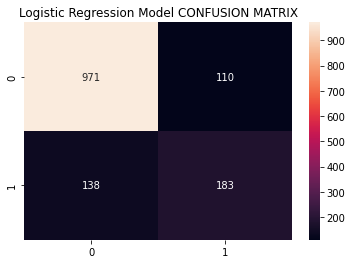

In [48]:

print(30*" ","Training using Logistic Regression Model")
# define our regression model
log_model = LogisticRegression()  
# train our model
log_model.fit(x_train, y_train)
#predictions
predictions=log_model.predict(x_test)

conf = confusion_matrix(y_test, predictions)

print("Classification Report:")
print('-'*60)
print(classification_report(y_test, predictions))
print('-'*60)

sns.heatmap(conf, annot=True,fmt = "d")
plt.title("Logistic Regression Model CONFUSION MATRIX",fontsize=12)
plt.show()

##SVC

                               Training using SVC Model
Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1081
           1       0.61      0.46      0.53       321

    accuracy                           0.81      1402
   macro avg       0.73      0.69      0.70      1402
weighted avg       0.80      0.81      0.80      1402

------------------------------------------------------------


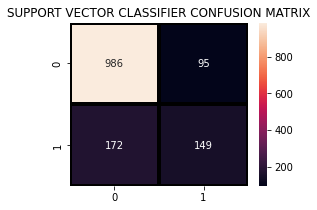

In [49]:

print(30*" ","Training using SVC Model")

svc_model = SVC()
svc_model.fit(x_train,y_train)
predict_y = svc_model.predict(x_test)

print("Classification Report:")
print('-'*60)
print(classification_report(y_test, predict_y))
print('-'*60)

plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=12)
plt.show()

##KNN

In [50]:

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(x_train, y_train)
  train_accuracies[neighbor] = knn.score(x_train, y_train)
  test_accuracies[neighbor] = knn.score(x_test, y_test)



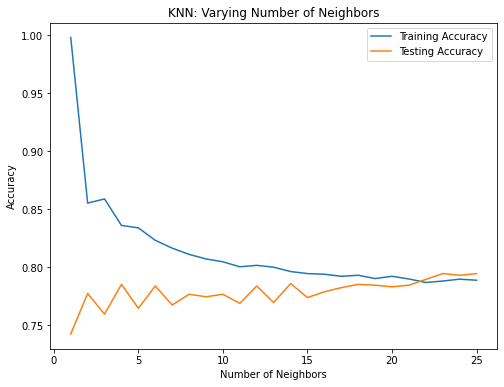

In [51]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, list(train_accuracies.values()), label="Training Accuracy")
plt.plot(neighbors, list(test_accuracies.values()), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

k=20 is the optimal value for k

                               Training using KNN Model with k=20
Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1081
           1       0.53      0.46      0.49       321

    accuracy                           0.78      1402
   macro avg       0.69      0.67      0.68      1402
weighted avg       0.77      0.78      0.78      1402

------------------------------------------------------------


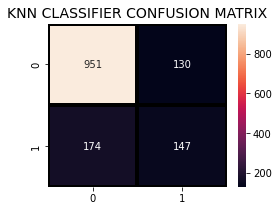

In [52]:
print(30*" ","Training using KNN Model with k=20")

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)

knn_predict_y = knn.predict(x_test)
print("Classification Report:")
print('-'*60)
print(classification_report(y_test, knn_predict_y))
print('-'*60)
plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test, knn_predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## Decision Tree

                               Training using Decision Tree Model
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1081
           1       0.53      0.57      0.55       321

    accuracy                           0.79      1402
   macro avg       0.70      0.71      0.70      1402
weighted avg       0.79      0.79      0.79      1402

------------------------------------------------------------


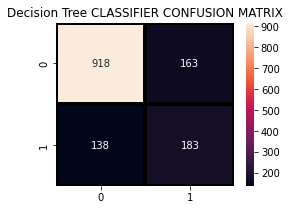

In [58]:


print(30*" ","Training using Decision Tree Model")

# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_leaf=0.1, random_state=1)
# Fit dt to the training set
dt.fit(x_train,y_train)
# Predict test-set labels
y_pred_dt= dt.predict(x_test)
# Evaluate test-set accuracy
#print(accuracy_score(y_test, y_pred_dt))

print('-'*60)
print(classification_report(y_test, y_pred_dt))
print('-'*60)
plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test, y_pred_dt),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Decision Tree CLASSIFIER CONFUSION MATRIX",fontsize=12)
plt.show()

##Adaboost

                               Training using Adaboost Model
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1081
           1       0.63      0.57      0.60       321

    accuracy                           0.83      1402
   macro avg       0.75      0.74      0.74      1402
weighted avg       0.82      0.83      0.82      1402

------------------------------------------------------------


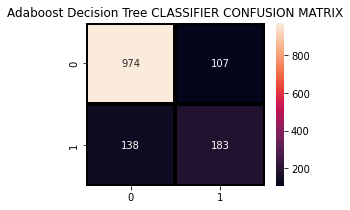

In [60]:
print(30*" ","Training using Adaboost Model")

adb_clf= AdaBoostClassifier()
# Fit 'adb_clf' to the training set
adb_clf.fit(x_train, y_train)
# Predict the test set probabilities of positive class
#y_pred_proba = adb_clf.predict_proba(x_test)[:,1]
y_pred_proba = adb_clf.predict(x_test)


# Evaluate test-set accuracy
#print(accuracy_score(y_test, y_pred_proba))

print('-'*60)
print(classification_report(y_test, y_pred_proba))
print('-'*60)
plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test, y_pred_proba),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Adaboost Decision Tree CLASSIFIER CONFUSION MATRIX",fontsize=12)
plt.show()

Logistic Regression and adaboost performed nearly the same and better than the rest.

However, as we see in both confusion matrices and classification reports, the performance of models is poor when predicting for positive cases due to Data Imbalance

# Improving Models' Performance

##Data Imbalance

(array([5153.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5153.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

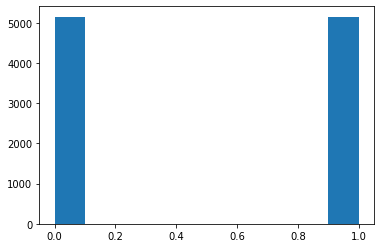

In [14]:
#or Smote
import imblearn
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
x_new, y_new= oversample.fit_resample(X, y)
plt.hist(y_new)# to see how it is fixed

In [16]:
# split dataset in a 80/20 split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

print("There are {} training example and {} testing example".format(np.shape(x_train2)[0],np.shape(x_test2)[0]))


There are 8244 training example and 2062 testing example


                               Training using Logistic Regression Model
Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1036
           1       0.76      0.82      0.79      1026

    accuracy                           0.78      2062
   macro avg       0.78      0.78      0.78      2062
weighted avg       0.78      0.78      0.78      2062

------------------------------------------------------------


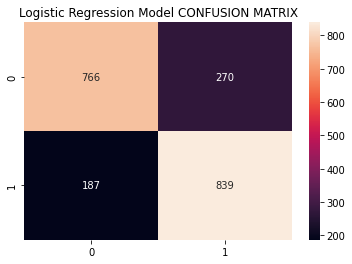

In [17]:

print(30*" ","Training using Logistic Regression Model")
# define our regression model
log_model2 = LogisticRegression()  
# train our model
log_model2.fit(x_train2, y_train2)
#predictions
log_predictions2=log_model2.predict(x_test2)

conf2 = confusion_matrix(y_test2, log_predictions2)

print("Classification Report:")
print('-'*60)
print(classification_report(y_test2, log_predictions2))
print('-'*60)

sns.heatmap(conf2, annot=True,fmt = "d")
plt.title("Logistic Regression Model CONFUSION MATRIX",fontsize=12)
plt.show()

                               Training using SVC Model
Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1036
           1       0.76      0.83      0.80      1026

    accuracy                           0.79      2062
   macro avg       0.79      0.79      0.79      2062
weighted avg       0.79      0.79      0.79      2062

------------------------------------------------------------


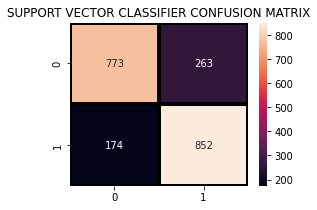

In [18]:

print(30*" ","Training using SVC Model")

svc_model2 = SVC()
svc_model2.fit(x_train2,y_train2)
predict_y2 = svc_model2.predict(x_test2)

print("Classification Report:")
print('-'*60)
print(classification_report(y_test2, predict_y2))
print('-'*60)

plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test2, predict_y2),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=12)
plt.show()

                               Training using KNN Model with k=20
Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.67      0.74      1036
           1       0.72      0.86      0.78      1026

    accuracy                           0.76      2062
   macro avg       0.77      0.76      0.76      2062
weighted avg       0.77      0.76      0.76      2062

------------------------------------------------------------


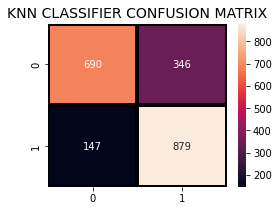

In [19]:
print(30*" ","Training using KNN Model with k=20")

knn2 = KNeighborsClassifier(n_neighbors=20)
knn2.fit(x_train2, y_train2)

knn_predict_y2 = knn2.predict(x_test2)
print("Classification Report:")
print('-'*60)
print(classification_report(y_test2, knn_predict_y2))
print('-'*60)
plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test2, knn_predict_y2),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

                               Training using Decision Tree Model
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1036
           1       0.75      0.73      0.74      1026

    accuracy                           0.75      2062
   macro avg       0.75      0.75      0.75      2062
weighted avg       0.75      0.75      0.75      2062

------------------------------------------------------------


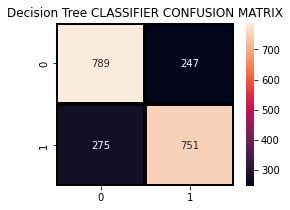

In [21]:
print(30*" ","Training using Decision Tree Model")

# Instantiate dt, set 'criterion' to 'gini'
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_leaf=0.1, random_state=1)
# Fit dt to the training set
dt2.fit(x_train2,y_train2)
# Predict test-set labels
y_pred_dt2= dt2.predict(x_test2)
# Evaluate test-set accuracy
#print(accuracy_score(y_test, y_pred_dt))

print('-'*60)
print(classification_report(y_test2, y_pred_dt2))
print('-'*60)
plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test2, y_pred_dt2),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Decision Tree CLASSIFIER CONFUSION MATRIX",fontsize=12)
plt.show()

                               Training using Adaboost Model
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1036
           1       0.80      0.85      0.82      1026

    accuracy                           0.82      2062
   macro avg       0.82      0.82      0.82      2062
weighted avg       0.82      0.82      0.82      2062

------------------------------------------------------------


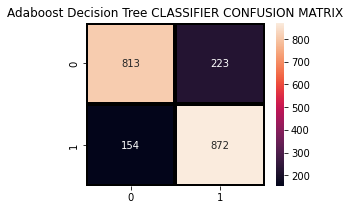

In [22]:
print(30*" ","Training using Adaboost Model")

adb_clf2= AdaBoostClassifier()
# Fit 'adb_clf' to the training set
adb_clf2.fit(x_train2, y_train2)
# Predict the test set probabilities of positive class
#y_pred_proba = adb_clf.predict_proba(x_test)[:,1]
y_pred_proba2 = adb_clf2.predict(x_test2)


# Evaluate test-set accuracy
#print(accuracy_score(y_test, y_pred_proba))

print('-'*60)
print(classification_report(y_test2, y_pred_proba2))
print('-'*60)
plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test2, y_pred_proba2),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Adaboost Decision Tree CLASSIFIER CONFUSION MATRIX",fontsize=12)
plt.show()

All models' performances improved after balancing the dataset. The performance metrics shown in the classification report increased in case of churned cases but decreased in case of unchurned cases (trade-off) 